# EDA Fourth Sticker

## 17m away from analyser


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy
from sklearn import preprocessing
import tensorflow as tf
from numpy.fft import *

import os
from os import listdir
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Reshape,Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D,Conv1D,MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
NUMBER_OF_FEATURES=3387

In [3]:
path_Fourth_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/Fourth_Sticker'

In [4]:
#Loading into CSV

Fourth_Sticker_BackgroundRFactivities = pd.read_csv(path_Fourth_sticker+'/BackgroundRFactivities.csv')
Fourth_Sticker_Connected = pd.read_csv(path_Fourth_sticker+'/Connected.csv')
Fourth_Sticker_Searching = pd.read_csv(path_Fourth_sticker+'/Searching.csv')
Fourth_Sticker_Searching_without_connected = pd.read_csv(path_Fourth_sticker+'/Searching_without_connecting_to_app.csv')


# Renaming the Title of each coloum 

Fourth_Sticker_BackgroundRFactivities=Fourth_Sticker_BackgroundRFactivities.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Fourth_Sticker_Connected=Fourth_Sticker_Connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Fourth_Sticker_Searching=Fourth_Sticker_Searching.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Fourth_Sticker_Searching_without_connected=Fourth_Sticker_Searching_without_connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})

print(type(Fourth_Sticker_BackgroundRFactivities))

# Changing pandas to numpy 
Fourth_Sticker_BackgroundRFactivities_numpy = Fourth_Sticker_BackgroundRFactivities.to_numpy()
Fourth_Sticker_Connected_numpy = Fourth_Sticker_Connected.to_numpy()
Fourth_Sticker_Searching_numpy =Fourth_Sticker_Searching.to_numpy()
Fourth_Sticker_Searching_without_connected_numpy = Fourth_Sticker_Searching_without_connected.to_numpy()

# Seperating I and Q in BackgroundRFactitvites

I_Data_Fourth_BackgroundRFactivities = Fourth_Sticker_BackgroundRFactivities_numpy[0:,0]
Q_Data_Fourth_BackgroundRFactivities = Fourth_Sticker_BackgroundRFactivities_numpy[0:,1]

I_Data_Fourth_BackgroundRFactivities= I_Data_Fourth_BackgroundRFactivities.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_Fourth_BackgroundRFactivities= Q_Data_Fourth_BackgroundRFactivities.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_Fourth_BackgroundRFactivities_2Dim = np.concatenate((I_Data_Fourth_BackgroundRFactivities,Q_Data_Fourth_BackgroundRFactivities),axis=1)


<class 'pandas.core.frame.DataFrame'>


In [5]:
Fourth_Sticker_Connected

,I_Data,Q_Data
0,0.000051,0.000016
1,-0.000015,-0.000024
2,-0.000015,0.000045
3,-0.000033,-0.000005
4,-0.000067,0.000008
...,...,...
3386995,0.000013,0.000032
3386996,-0.000011,0.000021
3386997,0.000004,-0.000011
3386998,-0.000045,-0.000050


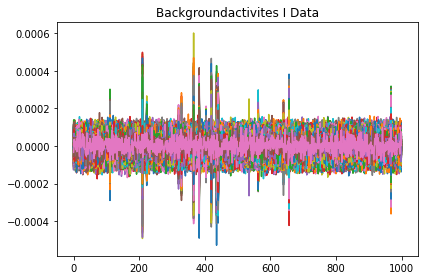

In [5]:
# plotting I data for BackgroundRF activities
plt.plot(I_Data_Fourth_BackgroundRFactivities)
plt.title("Backgroundactivites I Data")
plt.tight_layout()
plt.show()

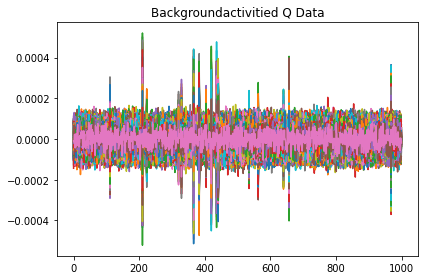

In [6]:
# plotting Q data for BackgroundRF activities
plt.plot(Q_Data_Fourth_BackgroundRFactivities)
plt.title("Backgroundactivitied Q Data")
plt.tight_layout()
plt.show()

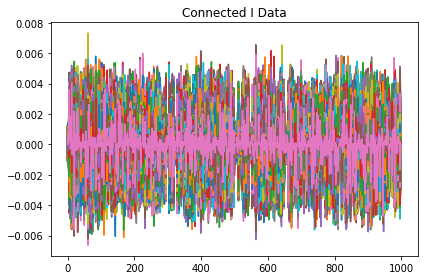

In [11]:
# Seperating I and Q  Connected
I_Data_Fourth_Connected = Fourth_Sticker_Connected_numpy[0:,0]
Q_Data_Fourth_Connected = Fourth_Sticker_Connected_numpy[0:,1]

I_Data_Fourth_Connected= I_Data_Fourth_Connected.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_Fourth_Connected= Q_Data_Fourth_Connected.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_Fourth_Connected_2Dim = np.concatenate((I_Data_Fourth_Connected,Q_Data_Fourth_Connected),axis=1)

# plotting I data for Connected activities

plt.plot(I_Data_Fourth_Connected[0:3877])
plt.title("Connected I Data")
plt.tight_layout()
plt.show()

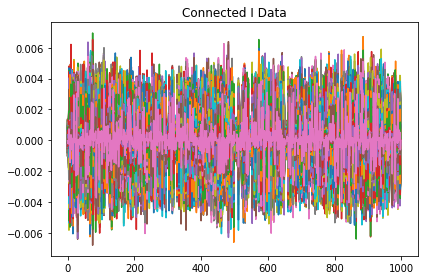

In [8]:
# plotting Q data for Connected activities

plt.plot(Q_Data_Fourth_Connected[0:3877])
plt.title("Connected I Data")
plt.tight_layout()
plt.show()

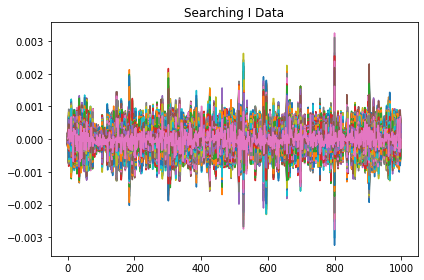

In [7]:
# Seperating I and Q from Searching

I_Data_Fourth_Searching = Fourth_Sticker_Searching_numpy[0:,0]
Q_Data_Fourth_Searching = Fourth_Sticker_Searching_numpy[0:,1]

I_Data_Fourth_Searching= I_Data_Fourth_Searching.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_Fourth_Searching= Q_Data_Fourth_Searching.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_Fourth_Searching_2Dim = np.concatenate((I_Data_Fourth_Searching,Q_Data_Fourth_Searching),axis=1)

# plotting I data for Searching activities

plt.plot(I_Data_Fourth_Searching[0:3877])
plt.title("Searching I Data")
plt.tight_layout()
plt.show()

In [8]:
print(Concatenate_IQ_Fourth_Searching_2Dim)

[[-4.1640e-05  3.0650e-05  5.3640e-05 ... -8.5300e-06 -2.2570e-05
  -4.7180e-05]
 [-7.2500e-06  8.8340e-05 -5.1540e-05 ... -2.3380e-05  3.2070e-05
  -8.6600e-06]
 [-1.3590e-05 -4.0480e-05 -2.2540e-05 ...  2.6130e-05 -1.5118e-04
   9.6460e-05]
 ...
 [-3.7200e-06 -1.5030e-05 -2.2740e-05 ... -2.7675e-04 -3.2719e-04
  -3.6479e-04]
 [ 6.9500e-06  2.4690e-05 -3.9550e-05 ... -5.9300e-06  3.4856e-04
  -2.1985e-04]
 [ 1.0510e-05  1.6740e-05  2.0360e-05 ... -3.4450e-05 -9.2000e-06
   1.4390e-05]]


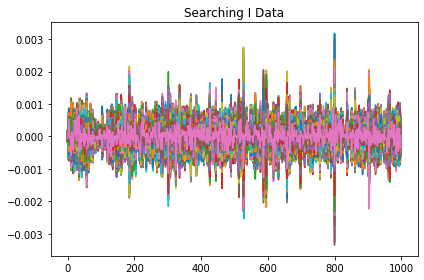

In [10]:
# plotting Q data for Searching activities

plt.plot(Q_Data_Fourth_Searching[0:3877])
plt.title("Searching I Data")
plt.tight_layout()
plt.show()

In [12]:
# Seperating the I and Q from Searching with WIFI established

I_Data_Fourth_Searching_WIFI_established = Fourth_Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_Fourth_Searching_WIFI_established = Fourth_Sticker_Searching_without_connected_numpy[0:,1]

I_Data_Fourth_Searching_WIFI_established= I_Data_Fourth_Searching_WIFI_established.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_Fourth_Searching_WIFI_established= Q_Data_Fourth_Searching_WIFI_established.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_Fourth_Searching_WIFI_established_2Dim = np.concatenate((I_Data_Fourth_Searching_WIFI_established,Q_Data_Fourth_Searching_WIFI_established),axis=1)


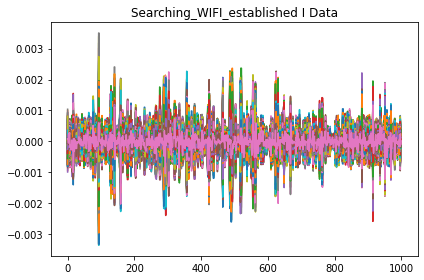

In [12]:
# plotting I data for Searching with WIFI established activities

plt.plot(I_Data_Fourth_Searching_WIFI_established[0:3877])
plt.title("Searching_WIFI_established I Data")
plt.tight_layout()
plt.show()

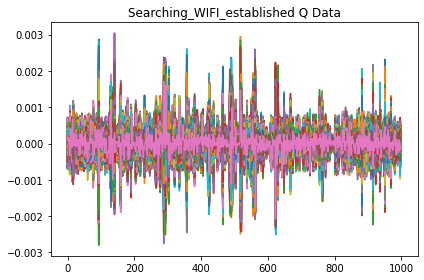

In [13]:
# plotting Q data for Searching with WIFI established activities

plt.plot(Q_Data_Fourth_Searching_WIFI_established[0:3877])
plt.title("Searching_WIFI_established Q Data")
plt.tight_layout()
plt.show()

# Scalling using Standard Scaler

In [15]:
from sklearn.preprocessing import RobustScaler,StandardScaler

def scaling_sticker (background,connected,searching,searchingWIFIestablished):
    
    global IQ_searching_WIFI_established_numpy_scaled
    global IQ_BackgroundRFactivites_numpy_scaled
    global IQ_connected_numpy_scaled
    global IQ_searching_numpy_scaled
    
    # Scalling each features
    
    scaler_backgroundRFactivites = StandardScaler()
    scaler_backgroundRFactivites_scaled = scaler_backgroundRFactivites.fit(background)
    IQ_BackgroundRFactivites_numpy_scaled= scaler_backgroundRFactivites_scaled.transform(background)

    scaler_connected = StandardScaler()
    scaler_connected_scaled = scaler_connected.fit(connected)
    IQ_connected_numpy_scaled= scaler_connected_scaled.transform(connected)


    scaler_searching = StandardScaler()
    scaler_searching_scaled = scaler_searching.fit(searching)
    IQ_searching_numpy_scaled= scaler_searching_scaled.transform(searching)

    scaler_searching_WIFI_established = StandardScaler()
    scaler_searching_WIFI_established_scaled = scaler_searching_WIFI_established.fit(searchingWIFIestablished)
    IQ_searching_WIFI_established_numpy_scaled= scaler_searching_WIFI_established_scaled.transform(searchingWIFIestablished)

In [16]:
scaling_sticker(Concatenate_IQ_Fourth_BackgroundRFactivities_2Dim,Concatenate_IQ_Fourth_Connected_2Dim,
               Concatenate_IQ_Fourth_Searching_2Dim,Concatenate_IQ_Fourth_Searching_WIFI_established_2Dim)

In [17]:
from sklearn.preprocessing import OneHotEncoder

Label =[['BackgroundRFactivities'],['Connected'],['Searching'],['Searching_WIFI_Establised']]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(Label)

Labelled = enc.transform(Label)

print("The labels are :")
print('\n')
print(Labelled)
print('\n')

np.random.seed(2016)
# concatenate the labels created by one hot encoded to the dataset before shuffling

IQ_backgroundRFactivites_concatenate = np.tile(Labelled[0][np.newaxis,:],(IQ_BackgroundRFactivites_numpy_scaled.shape[0],1))
IQ_BackgroundRFactivites_dataset=np.concatenate((IQ_BackgroundRFactivites_numpy_scaled,IQ_backgroundRFactivites_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_BackgroundRFactivites_dataset.shape))

IQ_connected_concatenate = np.tile(Labelled[1][np.newaxis,:],(IQ_connected_numpy_scaled.shape[0],1))
IQ_connected_dataset=np.concatenate((IQ_connected_numpy_scaled,IQ_connected_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_connected_dataset.shape))

IQ_searching_concatenate = np.tile(Labelled[2][np.newaxis,:],(IQ_searching_numpy_scaled.shape[0],1))
IQ_searching_dataset=np.concatenate((IQ_searching_numpy_scaled,IQ_searching_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_dataset.shape))

IQ_searching_wifi_established_concatenate = np.tile(Labelled[3][np.newaxis,:],(IQ_searching_WIFI_established_numpy_scaled.shape[0],1))
IQ_searching_wifi_established_dataset=np.concatenate((IQ_searching_WIFI_established_numpy_scaled,IQ_searching_wifi_established_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_wifi_established_dataset.shape))

print('\n')
print(IQ_BackgroundRFactivites_dataset[0:5])
print('\n')
print(IQ_connected_dataset[0:5])
print('\n')
print(IQ_searching_dataset[0:5])
print('\n')
print(IQ_searching_wifi_established_dataset[0:5])

The labels are :


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)


[[-0.78589294  0.64469825  1.25207983 ...  0.          0.
   0.        ]
 [ 1.58910139 -0.80854787 -0.05412002 ...  0.          0.
   0.        ]
 [ 0.64241568 -0.83608076 -0.29074451 ...  0.          0.
   0.        ]
 [ 1.027714   -0.65016558 -0.66841789 ...  0.          0.
   0.        ]
 [-0.44199486 -0.73249165 -0.29346746 ...  0.          0.
   0.        ]]


[[ 0.16941117 -0.07323864 -0.05303988 ...  1.          0.
   0.        ]
 [ 0.22219523  0.12816654 -0.1146716  ...  1.          0.
   0.        ]
 [ 0.01236012 -0.06902675  0.07654304 ...  1.          0.
   0.        ]
 [-2.01323263 -2.13553583 -2.37214591 ...  1.          0.
   0.        ]
 [ 0.02477369 -0.08395983  0.03658774 ...  1.          0.
   0.        ]]


[[-0.98053089  0.7575670

In [17]:
import copy

# Stack all of the dataset into one huge array for shuffling with the labels
stacked_data=np.vstack((IQ_BackgroundRFactivites_dataset,IQ_connected_dataset,IQ_searching_dataset,IQ_searching_wifi_established_dataset))
Dataset_Label_shuffled = copy.copy(stacked_data)
np.random.shuffle(Dataset_Label_shuffled)

# Specifying the index length of training , validation and test set
# 70 (train) , 20 (validation) , 10(Test)

length_of_X_train = int(0.7*Dataset_Label_shuffled.shape[0]) #94836
length_of_X_validation = (int(0.2*Dataset_Label_shuffled.shape[0]))+length_of_X_train #27096 #121932


Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,0:6774]
print('The size of Training dataset is : {0}'.format(Train_Dataset.shape))
Y_Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,6774:]

Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,0:6774]
Y_Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,6774:]
print('The size of Validation dataset is : {0}'.format(Validation_Dataset.shape))

print('\n')
print('Reshaping it into 3 Dim :')
Train_Dataset=Train_Dataset.reshape(2800,6774,1)
Validation_Dataset=Validation_Dataset.reshape(800,6774,1)
print('The reshape size for Training dataset is {0}'.format(Train_Dataset.shape))
print('The reshape size for Validation dataset is {0}'.format(Validation_Dataset.shape))

The size of Training dataset is : (2800, 6774)
The size of Validation dataset is : (800, 6774)


Reshaping it into 3 Dim :
The reshape size for Training dataset is (2800, 6774, 1)
The reshape size for Validation dataset is (800, 6774, 1)


In [18]:
Filterone = 100
Filtertwo = 160
KernalSize = 10
BATCH_SIZE = 200
epoch = 100
dropout = 0.2

model_m = Sequential()
model_m.add(Conv1D(filters=Filterone, kernel_size=KernalSize, activation='relu', input_shape=(6774,1)))
model_m.add(Conv1D(filters=Filterone, kernel_size=KernalSize, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(filters=Filtertwo, kernel_size=KernalSize, activation='relu'))
model_m.add(Conv1D(filters=Filtertwo, kernel_size=KernalSize, activation='relu'))
model_m.add(GlobalMaxPooling1D())
model_m.add(Dropout(dropout))
model_m.add(Dense(4, activation='softmax'))

model_m.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model_m.summary()


history=model_m.fit(Train_Dataset,Y_Train_Dataset, epochs=epoch, batch_size=BATCH_SIZE,shuffle=True, verbose=1, validation_data=(Validation_Dataset,Y_Validation_Dataset), callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)])

_, accuracy_validation = model_m.evaluate(Validation_Dataset, Y_Validation_Dataset)
print('Accuracy_validation: %.2f' % (accuracy_validation*100))

_, accuracy_Train = model_m.evaluate(Train_Dataset, Y_Train_Dataset)
print('Accuracy_Training: %.2f' % (accuracy_Train*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6765, 100)         1100      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6756, 100)         100100    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2252, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2243, 160)         160160    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2234, 160)         256160    
_________________________________________________________________
global_max_pooling1d (Global (None, 160)               0         
_________________________________________________________________
dropout (Dropout)            (None, 160)               0

In [19]:
model_m.save("{MODEL} Fourth_Sticker_TRAINED")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: {MODEL} Fourth_Sticker_TRAINED/assets


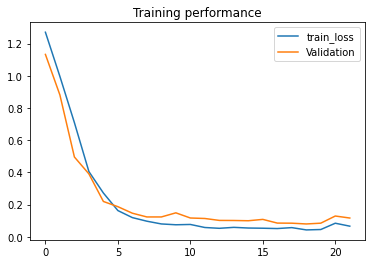

In [20]:
plt.figure()
plt.title('Training performance')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()

In [21]:
from tensorflow import keras
#load_fourth_sticker_model = keras.models.load_model("{MODEL} Fourth_Sticker_TRAINED")
load_first_sticker_model = keras.models.load_model("{MODEL} First_Sticker_TRAINED")
np.argmax(load_first_sticker_model.predict(Validation_Dataset[0:5]),axis=1)

array([0, 2, 0, 0, 0])

Argmax is a function which gives the index of the greatest number in the given row or column 

# Model Trained from 1st Sticker

In [26]:
from tensorflow import keras
load_first_sticker_model = keras.models.load_model("{MODEL} First_Sticker_TRAINED")
_,accuracy=load_first_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy*100))

25/25 [==============================] - 1s 30ms/step - loss: 1.9141 - accuracy: 0.6913
Accuracy: 69.13


# Model Trained from Third Sticker

In [27]:
from tensorflow import keras
load_Third_sticker_model = keras.models.load_model("{MODEL} Third_Sticker_TRAINED")
_,accuracy=load_Third_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy*100))

25/25 [==============================] - 1s 27ms/step - loss: 0.1413 - accuracy: 0.9650
Accuracy: 96.50


# Model Trained from Fourth Sticker

In [28]:
from tensorflow import keras
load_Fourth_sticker_model = keras.models.load_model("{MODEL} Fourth_Sticker_TRAINED")
_,accuracy=load_Fourth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy*100))

25/25 [==============================] - 1s 30ms/step - loss: 0.1162 - accuracy: 0.9812
Accuracy: 98.12


# Model Trained from Fifth Sticker

In [29]:
from tensorflow import keras
load_Fifth_sticker_model = keras.models.load_model("{MODEL} Fifth_Sticker_TRAINED")
_,accuracy=load_Fifth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy*100))

25/25 [==============================] - 1s 29ms/step - loss: 0.7729 - accuracy: 0.9013
Accuracy: 90.13


# Model Trained from every sticker

In [26]:
from tensorflow import keras
load_ALL_Model = keras.models.load_model("{MODEL} Entire_Sticker_TRAINED")

In [27]:
_,accuracy_loaded_first_model=load_ALL_Model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy_loaded_first_model*100))

25/25 [==============================] - 1s 27ms/step - loss: 1.2750 - accuracy: 0.8138
Accuracy: 81.38
